In [1]:
import cv2
import numpy as np
from skimage import draw
from skimage import io
 
# Read image
im_in = cv2.imread("analyses/MDA231_stopper_1_c3.tif", cv2.IMREAD_GRAYSCALE);
 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(im_in, 20, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
io.imsave(fname='temp_output.png', arr=im_out)

# im_out_inv = cv2.bitwise_not(im_out)


# dilate the mask:
k_size = 2
k_half = k_size/2
kernel = np.ones((k_size,k_size),np.uint8)
coords = draw.circle(k_half, k_half, k_half, shape=im_th.shape)
kernel[coords] = 1 
erosion = cv2.erode(im_out,kernel,iterations = 1)
dilation = cv2.dilate(cv2.bitwise_not(erosion),kernel,iterations = 1)
dilation = cv2.bitwise_not(dilation)

# io.imshow(dilation)
io.imsave(fname='mask.png', arr=dilation)

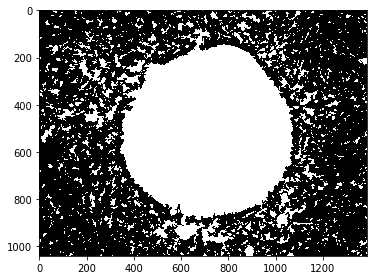

In [3]:
io.imshow(dilation)